# Flood fill Example

In [1]:
import os

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal

import fill

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 10)

### Read in the elevation array and display

In [2]:
input_ds = gdal.Open('example.tif', 0)
input_band = input_ds.GetRasterBand(1)
input_nodata = input_band.GetNoDataValue()
elevation = input_band.ReadAsArray(0, 0, input_ds.RasterXSize, input_ds.RasterYSize)
elevation[elevation <= input_nodata] = np.nan
input_ds = None

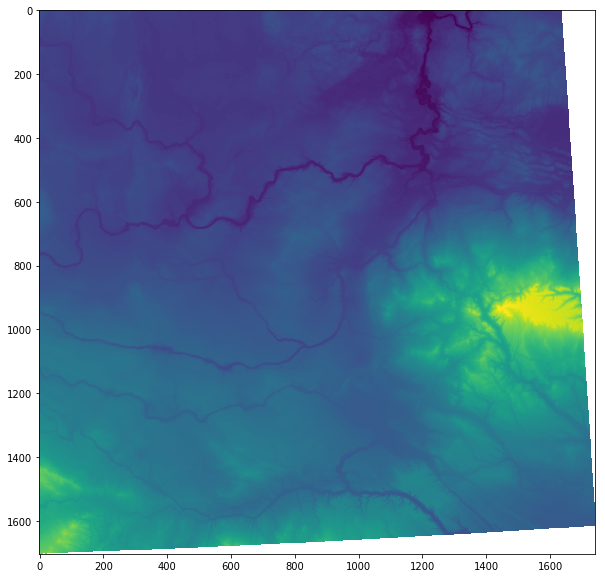

In [3]:
plt.imshow(elevation)
plt.show()

### Fill the array

In [4]:
filled = fill.flood_fill(elevation)
print('Done')

Flood Fill from Edges
  h_max: 1564.51281738
Done


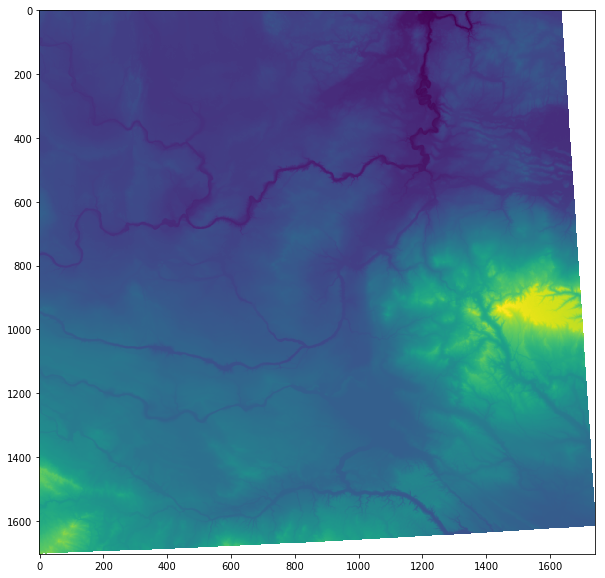

In [5]:
plt.imshow(filled)
plt.show()

### Show the difference

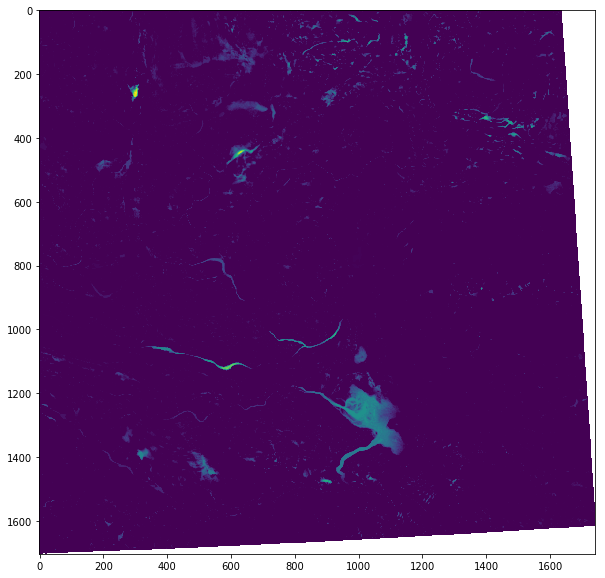

In [6]:
plt.imshow(filled - elevation)
plt.show()

### Save the filled array

In [7]:
input_ds = gdal.Open('example.tif', 0)
output_driver = gdal.GetDriverByName('GTiff')
output_ds = output_driver.CreateCopy('filled.tif', input_ds, 0)
input_ds = None

output_band = output_ds.GetRasterBand(1)
output_band.WriteArray(filled)
output_ds = None